<a href="https://colab.research.google.com/github/caropeboka/mask-detector/blob/main/MSIB_Object_Detection_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Muhammad Kevin Mahendra Caropeboka

MSIB Bisa AI

AI-Hacker

In [ ]:
#mount drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import os,re,cv2, glob, matplotlib.pyplot as plt

In [ ]:
import pathlib
dirs = pathlib.Path("drive/MyDrive/Dataset/mask-dataset")
print(dirs)

drive/MyDrive/Dataset/mask-dataset


In [ ]:
mask_dict={
    'incorrect': list(dirs.glob('mask_weared_incorrect/*')),
    'with_mask': list(dirs.glob('with_mask/*')),
    'without_mask': list(dirs.glob('without_mask/*')),
}
mask_labels={
    'incorrect': 0,
    'with_mask': 1,
    'without_mask': 2,
}

In [ ]:
x, y=[],[]
for mask_name, images in mask_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        x.append(img)
        y.append(mask_labels[mask_name])

In [ ]:
print(len(x))

9000


In [ ]:
import numpy as np
X_np = np.array(x)
y_np = np.array(y)

1


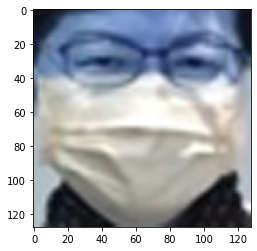

In [ ]:
#check random images
plt.imshow(X_np[4342])
print(y_np[4342])

In [ ]:
# preprocessing
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
X_train, X_test, y_train, y_test = tts(X_np, y_np, test_size = 0.2, random_state=101)

In [ ]:
X_train = X_train.astype('float32')
X_train /= 255 # pixel
X_test = X_test.astype('float32')
X_test /= 255

0


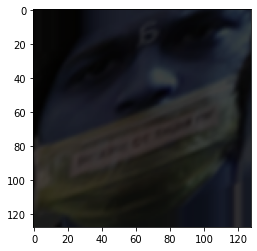

In [ ]:
plt.imshow(X_train[0])
print(y_train[0])

In [ ]:
X_train[0].shape

(128, 128, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.python.keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow_hub as hub
classifier="https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
mod=hub.KerasLayer(classifier, input_shape=(128,128,3), trainable=False)

In [ ]:
#training
num_mask=3
model=tf.keras.Sequential([
    mod, 
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(num_mask)
])

model.compile(
    optimizer="adam", 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc'])

from tensorflow.python.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=2)

import tensorflow as tf

# train_data = tf.data.Dataset.from_tensor_slices((trainMixed, trainVocals))
valid_data = (X_test, y_test)

# model.fit(train_data, epochs=10, validation_data=valid_data)

history = model.fit(X_train, y_train, batch_size=20,epochs=10,callbacks = es, validation_data=valid_data)

Epoch 1/10
360/360 [==============================] - 23s 33ms/step - loss: 0.1601 - acc: 0.9531 - val_loss: 0.0561 - val_acc: 0.9811
Epoch 2/10
360/360 [==============================] - 11s 31ms/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.0585 - val_acc: 0.9806
Epoch 3/10
360/360 [==============================] - 11s 31ms/step - loss: 0.0151 - acc: 0.9951 - val_loss: 0.0593 - val_acc: 0.9783
Epoch 4/10
360/360 [==============================] - 12s 32ms/step - loss: 0.0094 - acc: 0.9969 - val_loss: 0.0522 - val_acc: 0.9839
Epoch 5/10
360/360 [==============================] - 11s 30ms/step - loss: 0.0128 - acc: 0.9958 - val_loss: 0.1015 - val_acc: 0.9728
Epoch 6/10
360/360 [==============================] - 11s 30ms/step - loss: 0.0295 - acc: 0.9917 - val_loss: 0.0966 - val_acc: 0.9756
Epoch 00006: early stopping


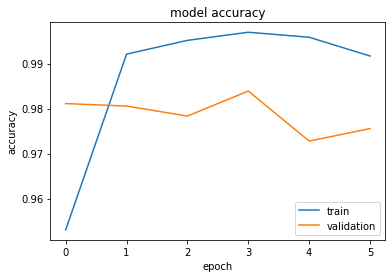

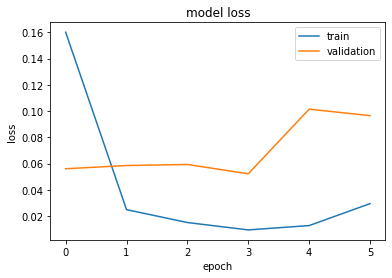

In [ ]:
#evaluation
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
preds=model.predict(X_test)
pred_classes=np.argmax(preds, axis=1)
pred_classes

57/57 [==============================] - 4s 41ms/step


array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
class_labels=['Incorrect','With','Without']
import sklearn.metrics as metrics
report = metrics.classification_report(y_test, pred_classes)
print(report) 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_classes)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       618
           1       0.98      0.97      0.98       566
           2       0.96      1.00      0.98       616

    accuracy                           0.98      1800
   macro avg       0.98      0.98      0.98      1800
weighted avg       0.98      0.98      0.98      1800



array([[595,   6,  17],
       [  9, 548,   9],
       [  0,   3, 613]])

Predicted :  1


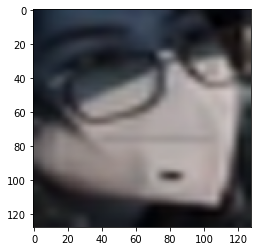

Predicted :  0


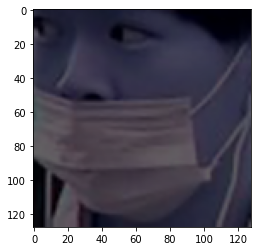

Predicted :  1


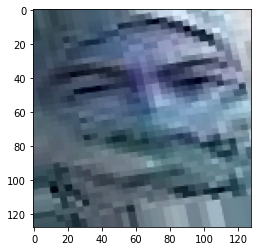

Predicted :  2


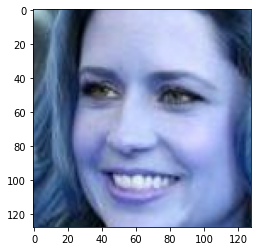

Predicted :  2


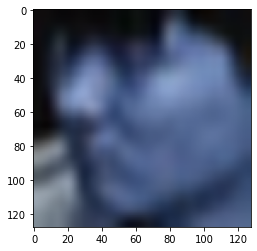

In [ ]:
for i in range(5):
    print("Predicted : ",pred_classes[i])
    plt.imshow(X_test[i])
    plt.show()